# From Disco to EDM

> Disco is a genre of dance music and a subculture that emerged in the 1970s from the United States' urban nightlife scene. Its sound is typified by four-on-the-floor beats, syncopated basslines, string sections, horns, electric piano, synthesizers, and electric rhythm guitars.
[Wikipedia](https://en.wikipedia.org/wiki/Disco)

In [257]:
!python -m spacy download en_core_web_sm > /dev/null

In [162]:
import wikipedia
import spacy
import re

nlp = spacy.load('en_core_web_sm')

text = wikipedia.page("Disco music").content

# Parse the text using spaCy
doc = nlp(text)

re_year = re.compile(r"([12][90]\d\d)")

# Iterate over the entities in the document
for entity in doc.ents:
  # Check if the entity is a date
  if entity.label_ == 'DATE':
    # Print the date and the associated text
    try:
        year = re_year.search(entity.text).group(1)
    except BaseException:
        year = entity.text
    print(f"{year},1,1\t{entity.text}\t{entity.sent.text}")
    print('-----------------------------------')

1970,1,1	the 1970s	Disco is a genre of dance music and a subculture that emerged in the 1970s from the United States' urban nightlife scene.
-----------------------------------
1960,1,1	the late 1960s	Disco started as a mixture of music from venues popular with Italian Americans, Hispanic and Latino Americans and Black Americans in Philadelphia and New York City during the late 1960s and early 1970s.
-----------------------------------
1970,1,1	early 1970s	Disco started as a mixture of music from venues popular with Italian Americans, Hispanic and Latino Americans and Black Americans in Philadelphia and New York City during the late 1960s and early 1970s.
-----------------------------------
1960,1,1	the 1960s	Disco can be seen as a reaction by the 1960s counterculture to both the dominance of rock music and the stigmatization of dance music at the time.
-----------------------------------
1970,1,1	the 1970s	In the course of the 1970s, disco music was developed further mainly by artists

In [249]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

%matplotlib inline

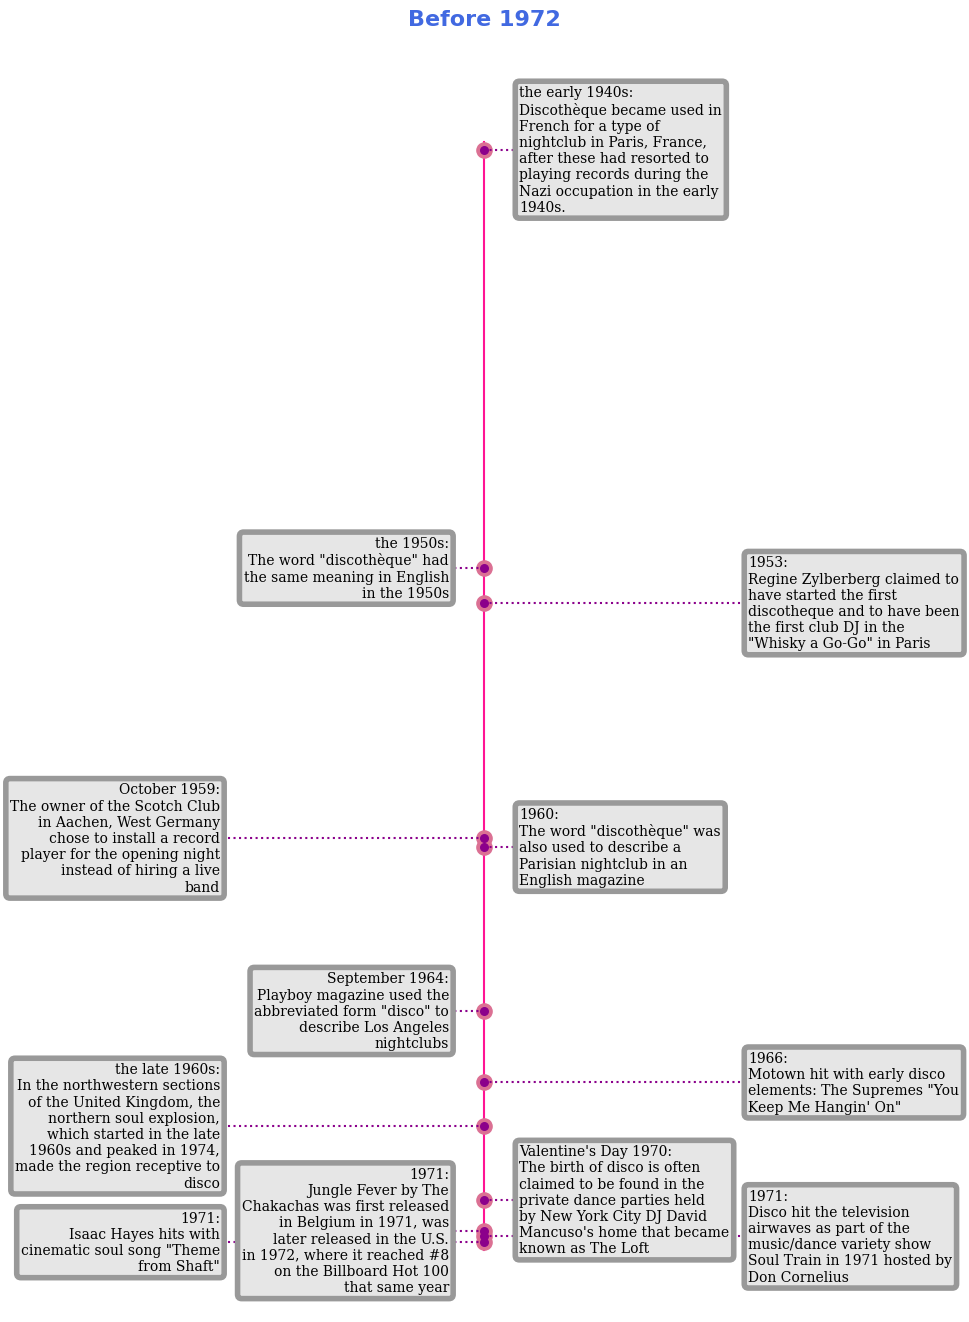

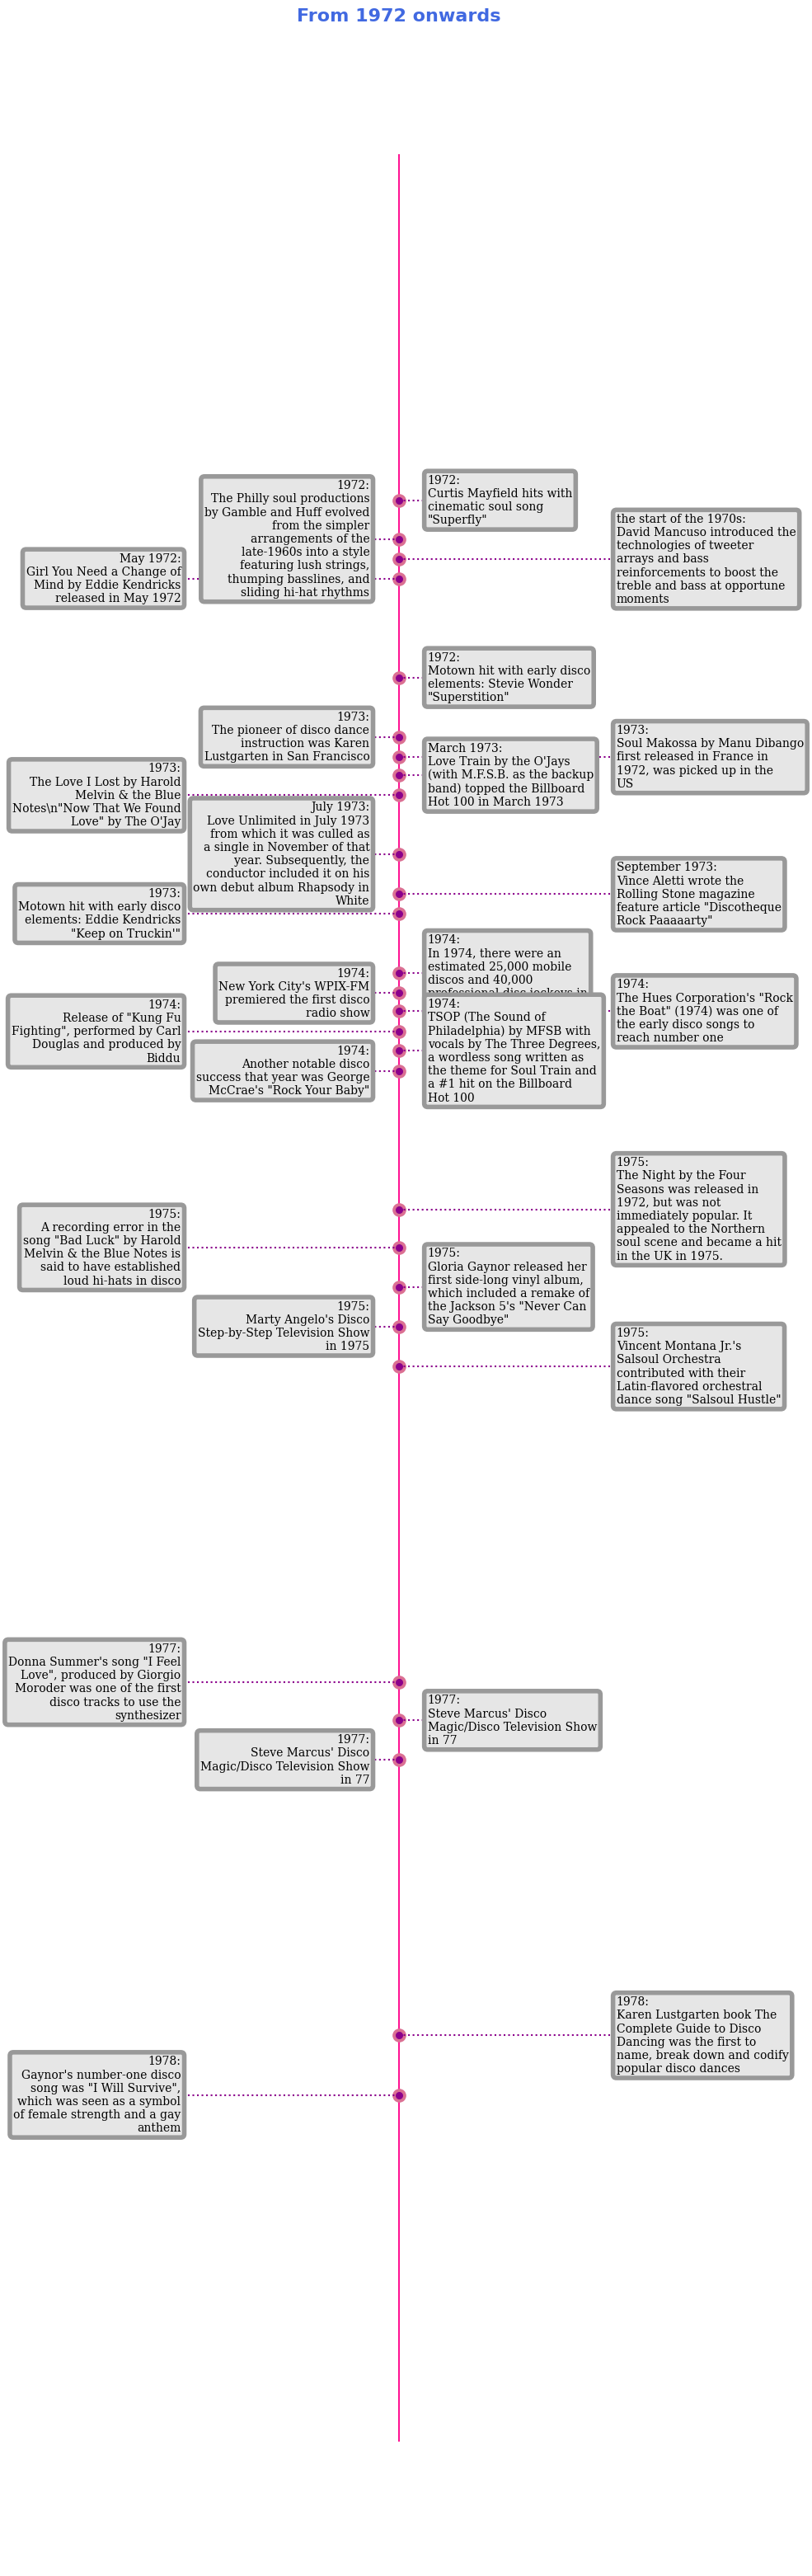

In [260]:
import pandas as pd
import numpy as np

df = pd.read_csv('./timeline.tsv',sep = '\t')

max_line_length = 28
sub_timelines = [{
    "smaller_than": "1971,06,01",
    "larger_than": "1900,06,01",
    "figsize": 16,
    "title": "Before 1972\n\n"
    },{
    "smaller_than": "2100,06,01",
    "larger_than": "1971,06,01",
    "figsize": 40,
    "title": "From 1972 onwards"
    }
]

boxdic={'facecolor':'0.9',
        'edgecolor':'0.6',
        'boxstyle':'round',
        'linewidth':4,
       }

for sub_timeline in sub_timelines:
    subset_df = df[np.logical_and(
        sub_timeline["larger_than"] < df['date'], df['date'] <= sub_timeline["smaller_than"]
    )]
    dates=[date(*[int(c) for c in cell.split(",")]) for cell in subset_df['date'].to_list()]
    min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
    max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)


    # manually wrap the text into lines of max_line_length
    labels = []
    for label in subset_df['text'].to_list():
        lines = [];
        words = label.split(" ")
        line = words.pop(0)
        while words:
            next_word = words.pop(0)
            potential_next_line = f"{line} {next_word}"
            if len(potential_next_line) <= max_line_length:
                line = potential_next_line
            else:
                lines.append(line)
                line = next_word
        if line:
            lines.append(line)
        labels.append("\n".join(lines))
    date_labels = subset_df['date_label'].to_list()

    # prepend label with display date
    labels = [f"{l}:\n{t}" for l, t in zip (date_labels, labels)]

    # the main graph 
    fig, ax = plt.subplots(figsize=(8, sub_timeline["figsize"]))
    _ = ax.set_ylim(max_date, min_date)
    _ = ax.axvline(0, ymin=0.05, ymax=0.95, c='deeppink', zorder=1)
    _ = ax.scatter(np.zeros(len(dates)), dates, s=120, c='palevioletred', zorder=2)
    _ = ax.scatter(np.zeros(len(dates)), dates, s=30, c='darkmagenta', zorder=3)

    
    # create the text boxes and make them appear left and right
    label_offsets = np.repeat(4.0, len(dates))
    label_offsets[2::4] = max_line_length + 2.0
    label_offsets[3::4] = max_line_length + 2.0
    label_offsets[1::2] *= -1.0
    for i, (l, d) in enumerate(zip(labels, dates)):
        align = 'right'
        if i % 2 == 0:
            align = 'left'
        _ = ax.text(label_offsets[i], d, l, ha=align, fontfamily='serif',
                    bbox=boxdic, verticalalignment='center',fontsize=10)       


    # the lines joining the boxes to the main plot
    stems = np.repeat(4.0, len(dates))
    stems[2::4] = max_line_length + 4.0
    stems[3::4] = max_line_length + 4.0
    stems[1::2] *= -1.0
    x = ax.hlines(dates, xmin=0, xmax=stems, linestyles="dotted", color='darkmagenta')

    # hide lines around chart
    for spine in ["left", "top", "right", "bottom"]:
        _ = ax.spines[spine].set_visible(False)

    # hide tick labels
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])

    _ = ax.set_title(sub_timeline["title"], fontweight="bold", fontsize=16, 
                 color='royalblue')